In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pandas
import math

### Generate data 
Our simulated data is generated based on a linear relationship (slope=3), with a normally distributed error.

In [5]:
x = np.random.uniform(0, 10, 1000)
error_term = np.random.normal(0, 3, 1000)
y = 5 + 3*x + error_term

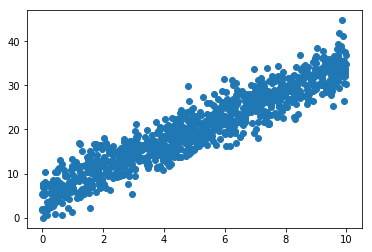

In [6]:
plt.scatter(x, y)
plt.show()

### Sample of 20

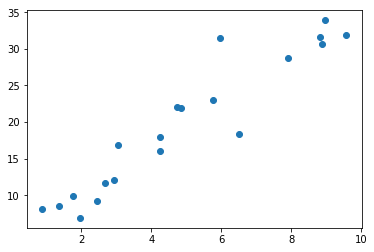

In [13]:
df = pandas.DataFrame(data = {'x':x, 'y':y})
sample = df.sample(20).sort_values(['x'])
plt.scatter(sample['x'], sample['y'])
plt.show()

## Best linear model
If we model the sample as being generated from a linear relationship, we recover pretty well the true parameters (slope of 3, intercept of 5), but not perfectly.

Our average on the whole population is somewhat larger than for the sample, because we are overfitting a little to the sample.

y = 4.32 + 3.12*x


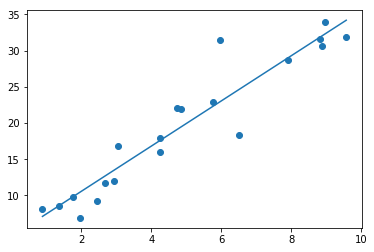

Mean absolute error on the sample = 2.07
Mean absolute error on the whole population = 2.39


In [14]:
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
reshaped_x = np.array(sample['x']).reshape(-1, 1)
model.fit(reshaped_x, sample['y'])
print("y = {0:0.3} + {1:0.3}*x".format(
    model.steps[1][1].intercept_, 
    model.steps[1][1].coef_[1]))
y_hat = model.predict(reshaped_x)
plt.scatter(sample['x'], sample['y'])
plt.plot(sample['x'], y_hat)
plt.show()

sample_residuals = y_hat-sample['y']
print("Mean absolute error on the sample = {0:0.3}".format(sample_residuals.abs().mean()))


residuals = df['y'] - model.predict(np.array(df['x']).reshape(-1, 1))
print("Mean absolute error on the whole population = {0:0.3}".format(residuals.abs().mean()))


### Best Cubic Model
If we fit the sample data to a cubic model, with more degrees of freedom, we get a better fit to the sample data. Notice that the average error on the sample is lower than for the linear model.

But we get a worse fit for the whole population. The average error is 2.55 instead of 2.39.

The cubic model, with more degrees of freedom, lets us (over)fit more to the sample.

y = 4.69 + 1.9*x + 0.44*x^2 + -0.04*x^3


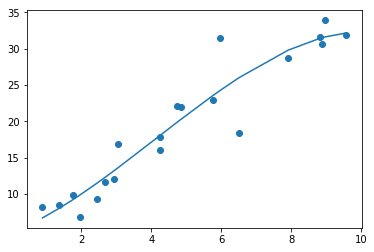

Mean absolute error on the sample = 1.94
Mean absolute error on the whole population = 2.55


In [15]:
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
reshaped_x = np.array(sample['x']).reshape(-1, 1)
model.fit(reshaped_x, sample['y'])
print("y = {0:0.3} + {1:0.2}*x + {2:0.2}*x^2 + {3:0.1}*x^3".format(
    model.steps[1][1].intercept_, 
    model.steps[1][1].coef_[1],
    model.steps[1][1].coef_[2],
    model.steps[1][1].coef_[3]))
y_hat = model.predict(reshaped_x)
plt.scatter(sample['x'], sample['y'])
plt.plot(sample['x'], y_hat)
plt.show()

sample_residuals = y_hat-sample['y']
print("Mean absolute error on the sample = {0:0.3}".format(sample_residuals.abs().mean()))

residuals = df['y'] - model.predict(np.array(df['x']).reshape(-1, 1))
print("Mean absolute error on the whole population = {0:0.3}".format(residuals.abs().mean()))
